# Practical 6

### Aim : Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions.

In [1]:
import pandas as pd

In [5]:
data=pd.read_csv("iris_code.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
y=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [39]:
X=data.iloc[:,[3,4]]

In [40]:
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [44]:
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)  

In [45]:
from sklearn.neighbors import KNeighborsClassifier  


In [46]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [47]:
y_pred= knn.predict(X_test)  

In [72]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

In [49]:
from matplotlib.colors import ListedColormap  

In [50]:
import numpy as nm  
import matplotlib.pyplot as mtp  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


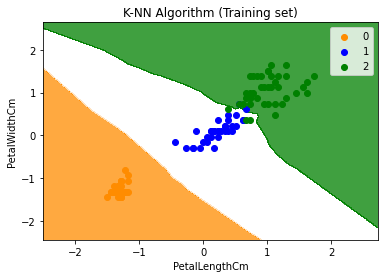

In [71]:
X_set, y_set = X_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, knn.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('darkorange','white','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  
        c = ListedColormap(('darkorange', 'blue','green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('PetalLengthCm')  
mtp.ylabel('PetalWidthCm')  
mtp.legend()  
mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


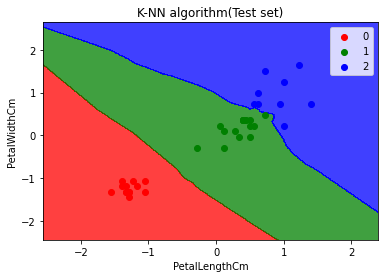

In [68]:
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, knn.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green','blue' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1] ,
        c = ListedColormap(('red', 'green','blue'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('PetalLengthCm')  
mtp.ylabel('PetalWidthCm')  
mtp.legend()  
mtp.show()  